<a href="https://colab.research.google.com/github/manudsanun/python_dataviz2024/blob/main/Mm_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Final 17/10/2024 14.00-18.00
นางสาวมนัสนันท์ มีชำนาญ 643020090-1 SC-Bio

# preprocess

In [30]:
#นำเข้าข้อมูลที่ใช้
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
# Load the pickle file
# Assume the pickle file is named 'your_file.pkl' and is located in your Google Drive
file_path = '/content/drive/MyDrive/Xnn_ppm.pickle'  # Replace with your actual file path
with open(file_path, 'rb') as file:
    data = pickle.load(file)

# Check the type and structure of the loaded data
type(data), len(data) if isinstance(data, (list, tuple, dict)) else None

(tuple, 2)

In [17]:
# Load the pickle file
with open(file_path, 'rb') as file:
    data = pickle.load(file)

# Check the type and structure of the loaded data
type(data), len(data) if isinstance(data, (list, tuple, dict)) else None

(tuple, 2)

In [19]:
# Since the file contains a tuple with 2 elements, let's inspect each part to understand the data structure.
# I'll check the type and dimensions of both elements.
X = data[0]
ppm = data[1]

# Checking the type and shape/dimensions of X and ppm
type(X), len(X), type(ppm), len(ppm)

(numpy.ndarray, 51, numpy.ndarray, 65536)

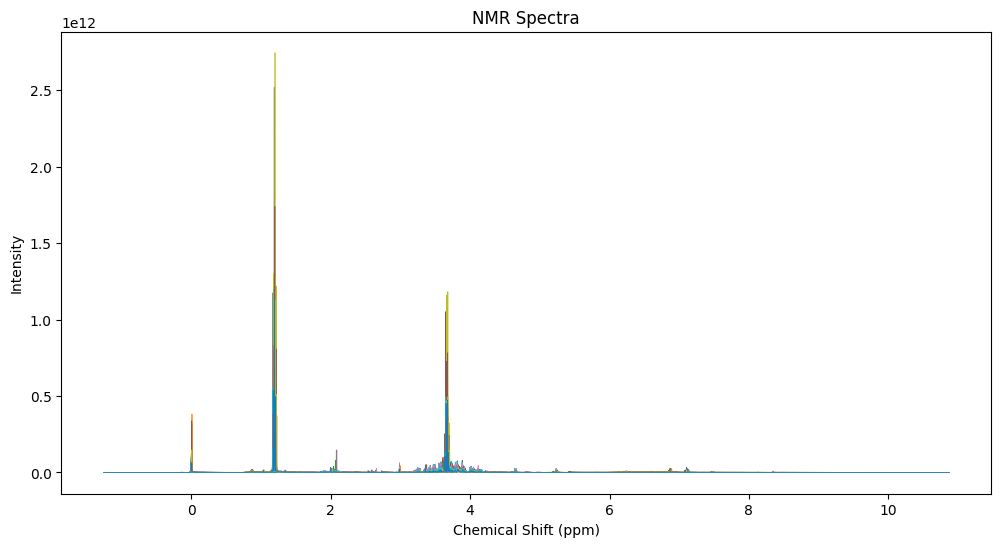

In [25]:
# prompt: ข้อมูลประกอบด้วยค่า X ขนาด 51x65536 ซึ่งเป็นค่าความเข้มข้นขององค์ประกอบ และ ppm ขนาด 65536 ซึ่งเป็นค่า Chemical shift สร้างกราฟแสดงข้อมุล

import matplotlib.pyplot as plt
import numpy as np

# Assuming X and ppm are defined from your previous code

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data for each sample (row in X)
for i in range(len(X)):
  ax.plot(ppm, X[i], linewidth=0.5)  # Adjust linewidth as needed


ax.set_xlabel('Chemical Shift (ppm)')
ax.set_ylabel('Intensity')
ax.set_title('NMR Spectra')

# Reverse the x-axis (optional, depending on your data)
# ax.invert_xaxis()

plt.show()

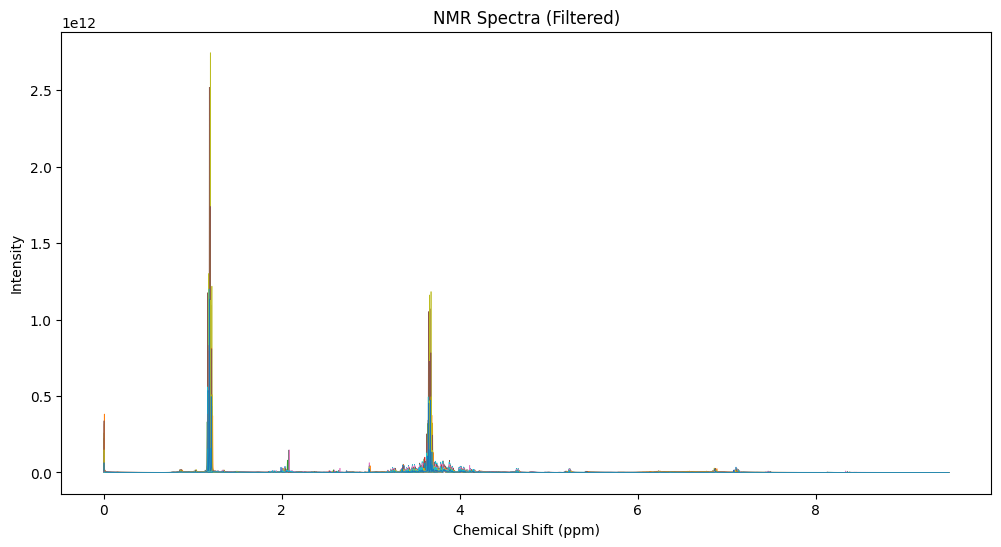

In [27]:
# prompt: จัดการข้อมูลโดย 1 ตัด ข้อมูลที่อยู่นอกช่วงที่สนใจ (ppm <= 0 และ ppm >= 9.5)

# Assuming X and ppm are defined from your previous code

# Find indices where ppm is within the desired range (0 < ppm < 9.5)
valid_indices = (ppm > 0) & (ppm < 9.5)

# Filter X and ppm based on the valid indices
X_filtered = [spectrum[valid_indices] for spectrum in X]
ppm_filtered = ppm[valid_indices]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data for each sample (row in X)
for i in range(len(X_filtered)):
  ax.plot(ppm_filtered, X_filtered[i], linewidth=0.5)  # Adjust linewidth as needed


ax.set_xlabel('Chemical Shift (ppm)')
ax.set_ylabel('Intensity')
ax.set_title('NMR Spectra (Filtered)')

# Reverse the x-axis (optional, depending on your data)
# ax.invert_xaxis()

plt.show()

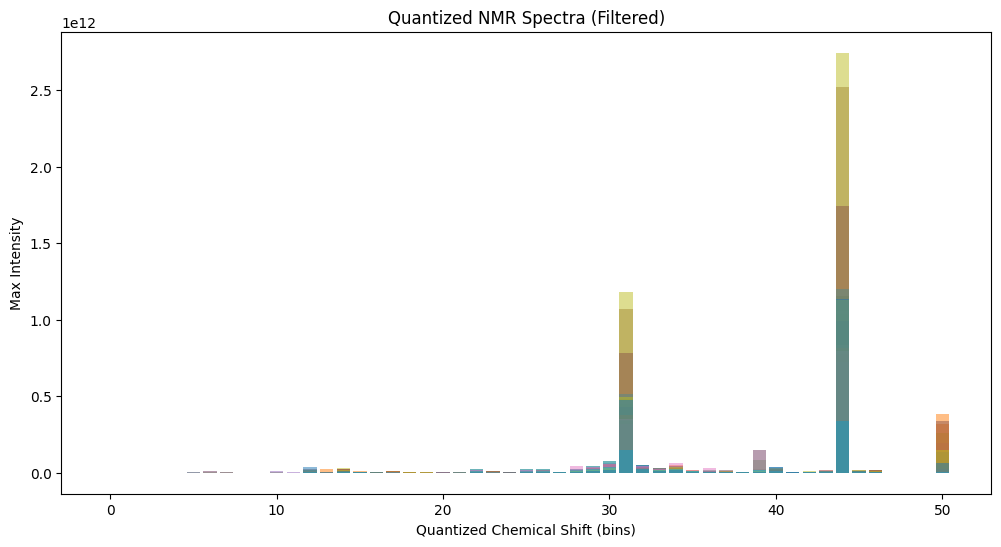

In [61]:
# prompt: จากข้อมูลที่ทำการ filtered แล้วทำการ quantize ข้อมูลโดยลดจำนวนข้อมูล ให้เหลือเพียง 51 x 400 โดยรวมข้อมูลที่อยู่ข้างกันและเลือกค่า max X และแสดงผลเป็นกราฟแท่ง

# Assuming X_filtered and ppm_filtered are defined from your previous code

# Define the new size for the quantized data
new_size_x = 51
new_size_y = 400

# Calculate the number of bins needed for X (ppm)
num_bins_x = new_size_x

# Calculate the bin size for ppm
bin_size_x = len(ppm_filtered) // new_size_x

# Quantize the data by taking the max value within each bin along the x-axis
quantized_X = []
for i in range(len(X_filtered)):
    quantized_spectrum = []
    for j in range(new_size_x):
        start_idx = j * bin_size_x
        end_idx = min((j + 1) * bin_size_x, len(ppm_filtered))
        if start_idx < end_idx:
            max_value = np.max(X_filtered[i][start_idx:end_idx])
            quantized_spectrum.append(max_value)
    quantized_X.append(quantized_spectrum)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Define the x-axis for the quantized data (center of each bin)
x_axis_quantized = np.arange(new_size_x)

# Plot the quantized data for each sample (row in X)
for i in range(len(quantized_X)):
    ax.bar(x_axis_quantized, quantized_X[i], width=0.8, alpha=0.5)

ax.set_xlabel('Quantized Chemical Shift (bins)')
ax.set_ylabel('Max Intensity')
ax.set_title('Quantized NMR Spectra (Filtered)')

plt.show()

# ทำ PCA ข้อมูลเพื่อให้สามารถ visualize ได้

In [62]:
# prompt: จาก quantized_ppm ทำการPCA ข้อมูลเพื่อให้สามารถ visualize ได้

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming quantized_X is your data for PCA
# Convert quantized_X to a NumPy array if it's not already
X_pca = np.array(quantized_X)

# Apply PCA with 2 components to reduce the dimensionality
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_pca)

# Create a DataFrame with the principal components
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,-4.592886e+11,7.366776e+09
1,-4.611420e+11,2.981204e+09
2,-4.696326e+11,-2.336668e+09
3,-4.720846e+11,-9.221709e+08
4,-4.625065e+11,5.097174e+09


# visualize ข้อมูลทั้ง 51 จุด เพื่อดูการจัดกลุ่มของข้อมูลเบื้องต้น

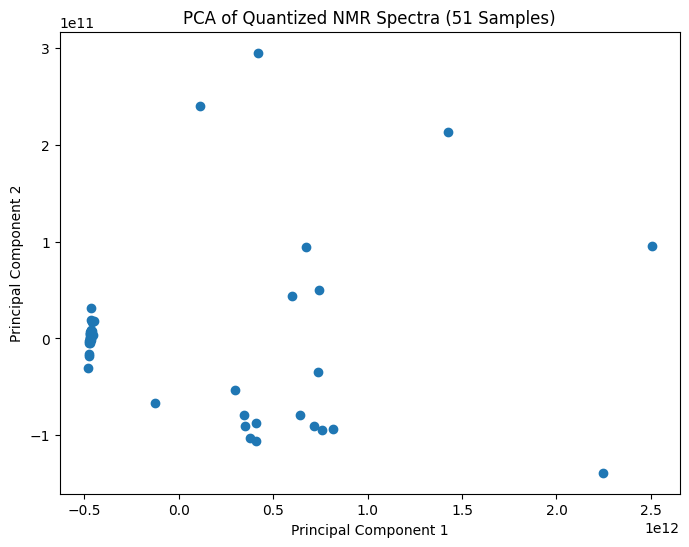

In [63]:
# prompt: visualize ข้อมูลทั้ง 51 จุด เพื่อดูการจัดกลุ่มของข้อมูลเบื้องต้น

# Assuming principalDf is your DataFrame with principal components

plt.figure(figsize=(8, 6))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Quantized NMR Spectra (51 Samples)')
plt.show()

# ตอบคำถามว่า data มีทั้งหมดกี่กลุ่ม โดย plot จุดข้อมูลแต่ละกลุ่มเป็นคนละสี

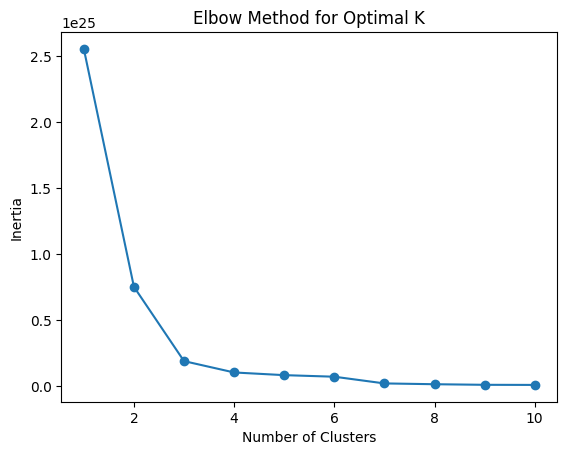

In [86]:
# prompt: จาก principalDf  จะแบ่งกลุ่ม data ได้ทั้งหมดกี่ cluster

from sklearn.cluster import KMeans

# Assuming principalDf is your DataFrame with principal components

# Find the optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(principalDf)
    inertia.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Elbow method คือการหาจุด "elbow" หรือจุดหักศอก บนกราฟ Elbow method ซึ่งจุดนี้จะบ่งบอกถึงจำนวน clusters ที่เหมาะสม การทดสอบจำนวน clusters ในช่วง 1 ถึง 10 ช่วยให้เห็นภาพรวมของกราฟและหาจุด elbow ได้ง่ายขึ้น

จะสามารถจัดกลุ่มได้ทั้งหมด 10 กลุ่ม

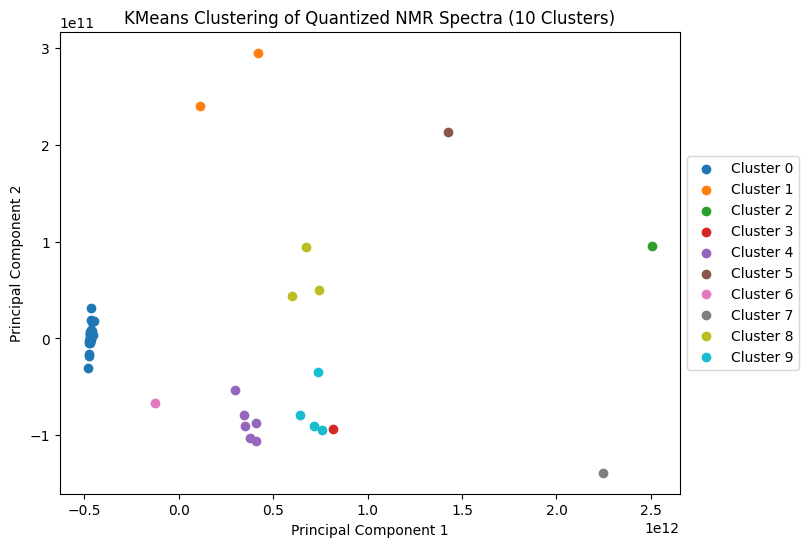

In [81]:
# prompt: plot จุดข้อมูลแต่ละกลุ่มเป็นคนละสี โดยมี cluster 10 กลุ่ม

# Assuming principalDf is your DataFrame with principal components

# Apply KMeans clustering with 10 clusters
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(principalDf)

# Add cluster labels to the DataFrame
principalDf['cluster'] = kmeans.labels_

# Create a scatter plot with different colors for each cluster
plt.figure(figsize=(8, 6))
for cluster in range(10):
  plt.scatter(principalDf[principalDf['cluster'] == cluster]['principal component 1'],
              principalDf[principalDf['cluster'] == cluster]['principal component 2'],
              label=f'Cluster {cluster}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering of Quantized NMR Spectra (10 Clusters)')

# Move the legend to the right side
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

Metabolites จำนวน 51 samples เมื่อนำมาวิเคราะห์พบว่าจัดกลุ่มตัวอย่างได้เป็น 10 กลุ่ม


# สร้าง ตารางที่มี column บอกว่า data แต่ละจุดนั้นอยู่กลุ่มไหน

In [78]:
# prompt: สร้าง ตารางที่มี column บอกว่า data แต่ละจุดนั้นอยู่กลุ่มไหน
n_clusters = 10
# Assuming principalDf is your DataFrame with principal components and cluster labels
# Create a new DataFrame with a column indicating the cluster for each data point
cluster_table = principalDf[['principal component 1', 'principal component 2', 'cluster']]
cluster_table

,principal component 1,principal component 2,cluster
0,-4.592886e+11,7.366776e+09,0
1,-4.611420e+11,2.981204e+09,0
2,-4.696326e+11,-2.336668e+09,0
3,-4.720846e+11,-9.221709e+08,0
4,-4.625065e+11,5.097174e+09,0
5,-4.710456e+11,5.001182e+09,0
6,-4.704002e+11,1.042615e+09,0
7,-4.564651e+11,1.676228e+10,0
8,-4.631087e+11,7.511233e+09,0
9,-4.659813e+11,9.051349e+09,0
